In [1]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
from tqdm import tqdm
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# China

In [4]:
#没添加湖北
provinces = ['安徽','福建','广东','广西','甘肃','贵州','河北','湖北','河南','黑龙江','湖南','吉林','辽宁','内蒙古','宁夏',
            '青海','山西','陕西','四川','云南']
prov_dict = {'安徽': 'Anhui', '福建': 'Fujian', '甘肃':'Gansu', '广东':'Guangdong', '广西':'Guangxi', 
             '贵州':'Guizhou',  '河北':'Hebei', '黑龙江':'Heilongjiang', '河南':'Henan', '湖北':'Hubei',
             '湖南':'Hunan', '内蒙古':'Inner Mongolia', '吉林':'Jilin', '辽宁':'Liaoning', '宁夏':'Ningxia',
             '青海':'Qinghai', '陕西':'Shaanxi','山西':'Shanxi', '四川':'Sichuan', '云南':'Yunnan'}
#  '湖北':'Hubei', '上海':'Shanghai'}

In [253]:
def get_totalDF(provinces):
    dic = {'province':[], 'score':[], 'counts':[], 'year':[]}
    for prov in tqdm(provinces):
        print(prov)
        prov_data = pd.read_excel('China_datasets/'+prov+'.xlsx')
        for year in [2018,2019,2020]:
            cur_scores = []
            cur_counts = []
            cur_prov = []
            cur_year = []
            
            prov_year = prov_data[prov_data['年份']==year]
            wen = prov_year[prov_year['文理']=='文科']
            li = prov_year[prov_year['文理']=='理科']
#             print(li.iloc[0])
#             print(wen)
            if li.iloc[0][0] >= wen.iloc[0][0]:
                max_score = li.iloc[0][0]
            else:
                max_score = wen.iloc[0][0]
            min_score = wen.iloc[len(wen)-1][0]
            
            for score in range(int(max_score), int(min_score-1), -1):
                c = 0
                if int(len(wen[wen['分数']==score])) > 0:
                    c += wen[wen['分数']==score]['人数'].values[0]
                if int(len(li[li['分数']==score])) > 0:
                    c += li[li['分数']==score]['人数'].values[0]
                cur_counts.append(c)
                cur_scores.append(score)
                cur_year.append(year)
                cur_prov.append(prov)
            dic['province'] += cur_prov
            dic['score'] += cur_scores
            dic['counts'] += cur_counts
            dic['year'] += cur_year
    return dic

In [254]:
total_df_arr = get_totalDF(provinces)

  0%|          | 0/19 [00:00<?, ?it/s]

安徽


  5%|▌         | 1/19 [00:03<01:08,  3.80s/it]

福建


 11%|█         | 2/19 [00:07<01:03,  3.72s/it]

广东


 16%|█▌        | 3/19 [00:13<01:09,  4.33s/it]

广西


 21%|██        | 4/19 [00:18<01:09,  4.62s/it]

甘肃


 26%|██▋       | 5/19 [00:24<01:11,  5.11s/it]

贵州


 32%|███▏      | 6/19 [00:29<01:05,  5.08s/it]

河北


 37%|███▋      | 7/19 [00:34<00:59,  4.97s/it]

河南


 42%|████▏     | 8/19 [00:39<00:54,  4.93s/it]

黑龙江


 47%|████▋     | 9/19 [00:44<00:50,  5.08s/it]

湖南


 53%|█████▎    | 10/19 [00:49<00:45,  5.02s/it]

吉林


 58%|█████▊    | 11/19 [00:54<00:39,  4.91s/it]

辽宁


 63%|██████▎   | 12/19 [00:58<00:32,  4.63s/it]

内蒙古


 68%|██████▊   | 13/19 [01:03<00:28,  4.80s/it]

宁夏


 74%|███████▎  | 14/19 [01:06<00:21,  4.30s/it]

青海


 79%|███████▉  | 15/19 [01:12<00:19,  4.95s/it]

山西


 84%|████████▍ | 16/19 [01:15<00:12,  4.21s/it]

陕西


 89%|████████▉ | 17/19 [01:20<00:08,  4.42s/it]

四川


 95%|█████████▍| 18/19 [01:25<00:04,  4.56s/it]

云南


100%|██████████| 19/19 [01:29<00:00,  4.69s/it]


In [255]:
tot_df = pd.DataFrame.from_dict(total_df_arr)

In [256]:
tot_df

,province,score,counts,year
0,安徽,713,1,2018
1,安徽,712,0,2018
2,安徽,711,0,2018
3,安徽,710,0,2018
4,安徽,709,1,2018
...,...,...,...,...
30979,云南,204,8,2020
30980,云南,203,9,2020
30981,云南,202,12,2020
30982,云南,201,11,2020


In [257]:
shanghai = pd.read_excel('China_datasets/'+'上海'+'.xlsx')
shanghai.rename(columns={'总分':'score','人数':'counts','省份':'province','年份':'year'}, inplace=True)
total_df = pd.concat([tot_df, shanghai])
# shanghai.head()

In [2]:
world_covid = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-01-2021.csv')
# world_covid.head()

In [5]:
china = world_covid[world_covid['Country_Region']=='China']
china = china[china['Province_State'].isin(list(prov_dict.values()))]
china_confirmed = china['Confirmed'].values

In [261]:
china_pop = pd.read_excel('china_population.xlsx')
prov_arr = china['Province_State'].values
population = []
for prov in prov_arr:
#     print(prov)
    chinese_prov = list(prov_dict.keys())[list(prov_dict.values()).index(prov)]
    pop_prov = china_pop[china_pop['province']==chinese_prov]['population'].values[0]
    population.append(pop_prov)

In [262]:
population = np.array(population)
covid_by_pop = china_confirmed/population
covid_by_pop.max()

3.026679235548737e-05

### Get death counts graph

In [3]:
countries = ['Argentina','Belgium','Brazil','Canada','China','Egypt','France','Germany','India','Ireland',
            'Italy','Japan','Mexico','Poland','Russia','Turkey','US']
death_counts = []

for country in countries:
    country_df = world_covid[world_covid['Country_Region']==country]
    death_counts.append(country_df['Deaths'].values.sum())

In [11]:
country_dict = {'countries':countries, 'death_counts': death_counts}
dff = pd.DataFrame.from_dict(country_dict)
dff = dff.sort_values(by='death_counts',ascending=False)

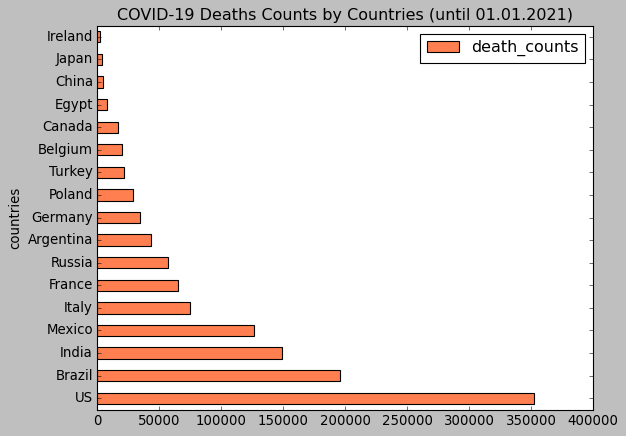

In [12]:
plt.style.use('classic')
ax = dff.plot.barh(x='countries',y='death_counts',color='coral')
ax.set_title('COVID-19 Deaths Counts by Countries (until 01.01.2021)')
rects = ax.patches

# Make some labels.
labels = death_counts


### China confirmed cases graph

In [12]:
china_sort = china.sort_values(by='Confirmed')

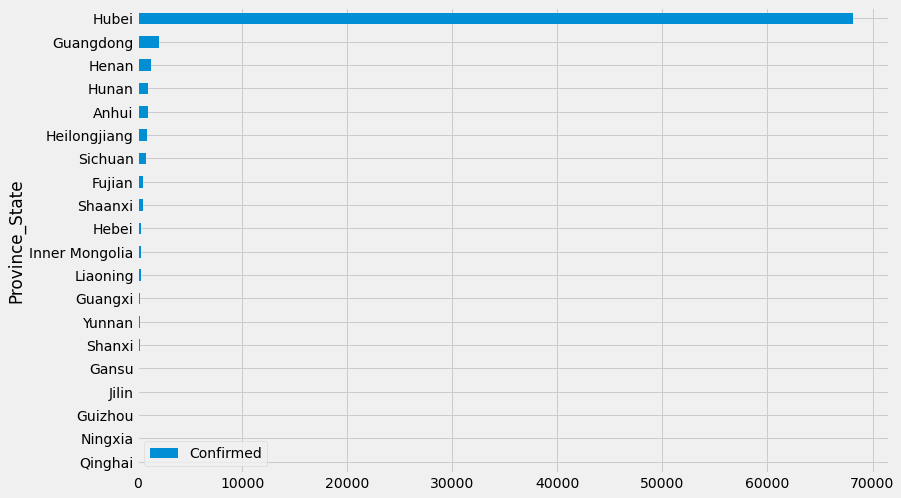

In [13]:
plt.style.use('fivethirtyeight')
# plt.figure(figsize=(12,8))
china_sort.plot.barh(x='Province_State', y='Confirmed',figsize=(12,8));
# china.plot();

### Functions

In [246]:
def get_scoreArr(df_arr, count_type):
    all_years = []
    for j in range(len(df_arr)):
        res = []
#         if count_type == 'total':
        scores = df_arr[j]['score'].tolist()
        counts = df_arr[j]['counts'].tolist()
#         else:
#             scores = df_arr[j]['分数'].tolist()
#             counts = df_arr[j]['人数'].tolist()            

        for i in range(len(scores)):
#             print(scores[i])
#             print(counts[i])
            res += [int(scores[i])]*int(counts[i])
        all_years.append(np.array(res))
#     print('ok')
    return all_years

In [11]:
def score_stats(scores, province):
    for i in range(len(scores)):
        scores_df = pd.DataFrame(list(zip(scores[i])),
               columns =['score'])
        print(f'{2018+i} year {province} Province statistics: ')
        print(scores_df.describe())
        print('\n')

In [12]:
def get_ks(scores):
    print('KS test for 2018-2019: ', stats.ks_2samp(scores[0], scores[1]))
    print('KS test for 2019-2020: ', stats.ks_2samp(scores[1], scores[2]))

In [22]:
def get_KS(provinces):
    ks_arr = [[], []]
    wen_arr = [[],[]]
    li_arr = [[],[]]
    
    for prov in provinces:
#         print(prov)
        for i in range(2):
            state_df = total_df[total_df['province']==prov]
            state19 = state_df[state_df['year']==2018+i]
            state20 = state_df[state_df['year']==2018+i+1]

            subject_df = pd.read_excel('China_datasets/'+prov+'.xlsx')
            subject19 =  subject_df[subject_df['年份']==2018+i]
            subject20 =  subject_df[subject_df['年份']==2018+i+1]
            wen19 = subject19[subject19['文理']=='文科']
            wen20 = subject20[subject20['文理']=='文科']
            li19 = subject19[subject19['文理']=='理科']
            li20 = subject20[subject20['文理']=='理科']
            
#             print(state19)
            total_scores = get_scoreArr([state19, state20], 'total')
            ks_arr[i].append(stats.ks_2samp(total_scores[0], total_scores[1])[0])
            wen_scores = get_scoreArr([wen19, wen20], 'wen')
            wen_arr[i].append(stats.ks_2samp(wen_scores[0], wen_scores[1])[0])
            li_scores = get_scoreArr([li19, li20], 'li')
            li_arr[i].append(stats.ks_2samp(li_scores[0], li_scores[1])[0])
            
        
    return ks_arr, wen_arr, li_arr

In [14]:
def distr_plot(df_arr):
    fig, axs = plt.subplots(1, 3, figsize=(12,3))
    for i in range(len(df_arr)):
        sorted_df = df_arr[i].sort_values(by='score')
        x = sorted_df['score']
        y = sorted_df['counts']
        axs[i].plot(x, y)
        axs[i].set_title('Year' + str(2018+i))

In [15]:
def add_eng(df, prov_dict):
    provs = df['provinces'].values
    eng = []
    for prov in provs:
        eng.append(prov_dict[prov])
    df['eng_provinces'] = eng
    return df

In [16]:
from statistics import median

In [17]:
def get_stats(provinces, count_type):
    medians = []
    quantile75 = []
    quantile25 = []
    quantile50 = []
    for i in range(len(provinces)):
        if count_type == 'total':
            prov_df = total_df[total_df['province']==provinces[i]]
        elif count_type == 'wen':
            prov_df = pd.read_excel('China_datasets/'+provinces[i]+'.xlsx')
            prov_df = prov_df[prov_df['文理']=='文科']
        else:
            prov_df = pd.read_excel('China_datasets/'+provinces[i]+'.xlsx')
            prov_df = prov_df[prov_df['文理']=='理科']
        prov_df.rename(columns={'分数': 'score', '省份': 'province', '人数':'counts', '年份':'year'}, inplace=True)
        prov18 = prov_df[prov_df['year']==2018]
        prov19 = prov_df[prov_df['year']==2019]
        prov20 = prov_df[prov_df['year']==2020]
        
        score_arr = get_scoreArr([prov18, prov19, prov20], count_type)
#         print(score_arr)
        score_arr = np.array(score_arr)
#         print(score_arr.shape)
        med_prov = np.zeros(3)
        q75_prov = np.zeros(3)
        q25_prov = np.zeros(3)
        q50_prov = np.zeros(3)
        for i in range(3):
            med_prov[i] = np.median(score_arr[i])
            q75_prov[i] = np.quantile(score_arr[i], 0.75)
            q25_prov[i] = np.quantile(score_arr[i], 0.25)
            q50_prov[i] = np.quantile(score_arr[i], 0.5)
        medians.append(med_prov)
        quantile75.append(q75_prov)
        quantile25.append(q25_prov)
        quantile50.append(q50_prov)
    return np.array(medians), np.array(quantile25), np.array(quantile50), np.array(quantile75)

In [90]:
tot_med, tot_quant25, tot_quant50, tot_quant75 = get_stats(provinces, 'total')
wen_med, wen_quant25, wen_quant50, wen_quant75 = get_stats(provinces, 'wen')
li_med, li_quant25, li_quant50, li_quant75 = get_stats(provinces, 'li')

In [247]:
def get_trimmedMean(provinces, count_type):
    means = []
    for i in range(len(provinces)):
        if count_type == 'total':
            prov_df = total_df[total_df['province']==provinces[i]]
        elif count_type == 'wen':
            prov_df = pd.read_excel('China_datasets/'+provinces[i]+'.xlsx')
            prov_df = prov_df[prov_df['文理']=='文科']
            prov_df.rename(columns={'分数': 'score', '省份': 'province', '人数':'counts', '年份':'year'}, inplace=True)
        else:
            prov_df = pd.read_excel('China_datasets/'+provinces[i]+'.xlsx')
            prov_df = prov_df[prov_df['文理']=='理科']
            prov_df.rename(columns={'分数': 'score', '省份': 'province', '人数':'counts', '年份':'year'}, inplace=True)
        prov18 = prov_df[prov_df['year']==2018]
        prov18 = prov18[prov18['score'] > 200] 
        prov18 = prov18[prov18['score'] <= 550]
        prov19 = prov_df[prov_df['year']==2019]
        prov19 = prov19[prov19['score'] > 200] 
        prov19 = prov19[prov19['score'] <= 550]
        prov20 = prov_df[prov_df['year']==2020]
        prov20 = prov20[prov20['score'] > 200]
        prov20 = prov20[prov20['score'] <= 550]
        
        score_arr = get_scoreArr([prov18, prov19, prov20], count_type)
#         print(score_arr)
        score_arr = np.array(score_arr)
#         print(score_arr.shape)
        mean_prov = np.zeros(3)
        for i in range(3):
            mean_prov[i] = np.median(score_arr[i])

        means.append(mean_prov)
    return np.array(means)  

In [264]:
total_means = get_trimmedMean(provinces, 'total')
wen_means = get_trimmedMean(provinces, 'wen')
li_means = get_trimmedMean(provinces, 'li')

In [265]:
total_mean18 = total_means[:,0]
total_mean19 = total_means[:,1]
total_mean20 = total_means[:,2]
wen_mean18 = wen_means[:,0]
wen_mean19 = wen_means[:,1]
wen_mean20 = wen_means[:,2]
li_mean18 = li_means[:,0]
li_mean19 = li_means[:,1]
li_mean20 = li_means[:,2]

#### Plot mean, median and quantiles graphs

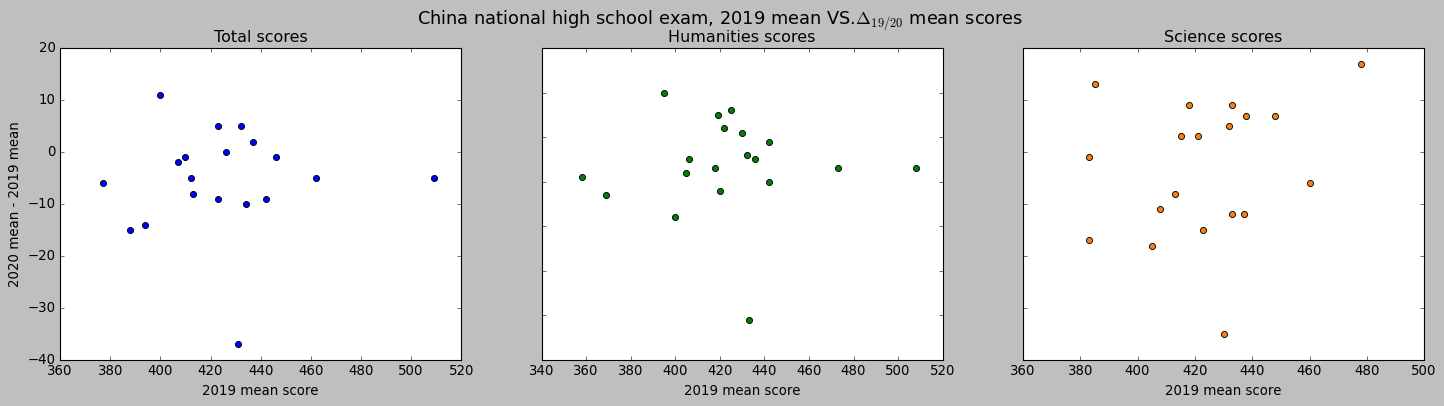

In [226]:
#Plot Mean
fig, axs = plt.subplots(1,3,figsize=(22,5))
axs[0].scatter(total_mean19, total_mean20 - total_mean19, s=30,edgecolor='black',linewidth=0.8)
axs[0].set_title('Total scores')
axs[1].scatter(wen_mean19, wen_mean20 - wen_mean19, color='green',s=30,edgecolor='black',linewidth=0.8)
axs[1].set_title('Humanities scores')
axs[2].scatter(li_mean19, li_mean20 - li_mean19, color='tab:orange',s=30,edgecolor='black',linewidth=0.8)
axs[2].set_title('Science scores')
plt.suptitle('China national high school exam, 2019 mean VS.' r"$\Delta_{19/20}$ mean scores", fontsize=16)
for ax in axs.flat:
    ax.set(xlabel='2019 mean score', ylabel='2020 mean - 2019 mean')
for ax in fig.get_axes():
    ax.label_outer()
fig.subplots_adjust(top=0.88)

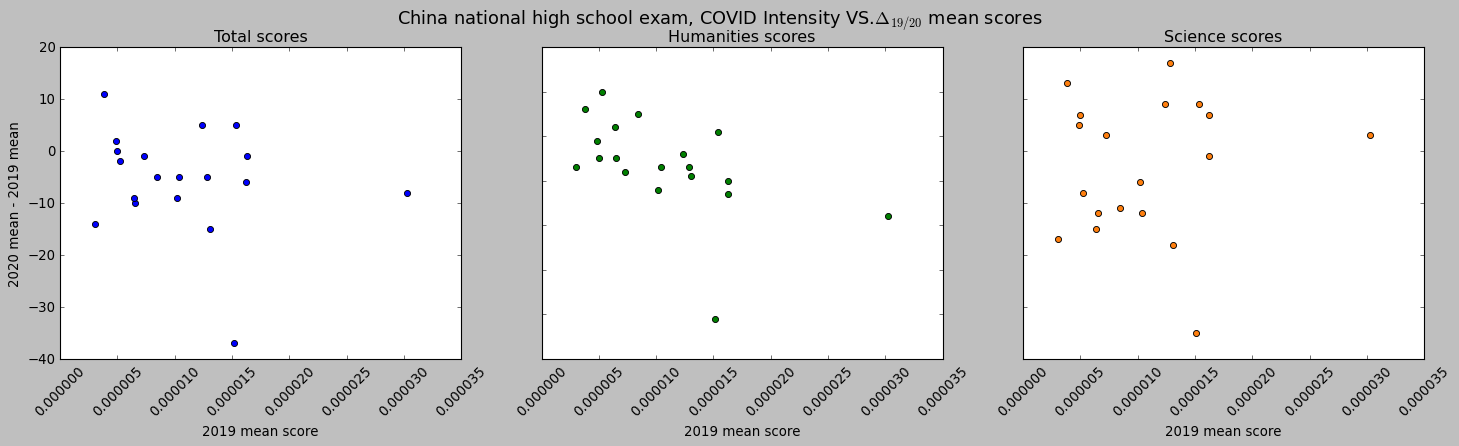

In [271]:
#Plot Mean
fig, axs = plt.subplots(1,3,figsize=(22,5))
axs[0].scatter(covid_by_pop, total_mean20 - total_mean19, s=30,edgecolor='black',linewidth=0.8)
axs[0].set_title('Total scores')
axs[1].scatter(covid_by_pop, wen_mean20 - wen_mean19, color='green',s=30,edgecolor='black',linewidth=0.8)
axs[1].set_title('Humanities scores')
axs[2].scatter(covid_by_pop, li_mean20 - li_mean19, color='tab:orange',s=30,edgecolor='black',linewidth=0.8)
axs[2].set_title('Science scores')
plt.suptitle('China national high school exam, COVID Intensity VS.' r"$\Delta_{19/20}$ mean scores", fontsize=16)
for ax in axs.flat:
    ax.set(xlabel='2019 mean score', ylabel='2020 mean - 2019 mean')
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
for ax in fig.get_axes():
    ax.label_outer()
fig.subplots_adjust(top=0.88)

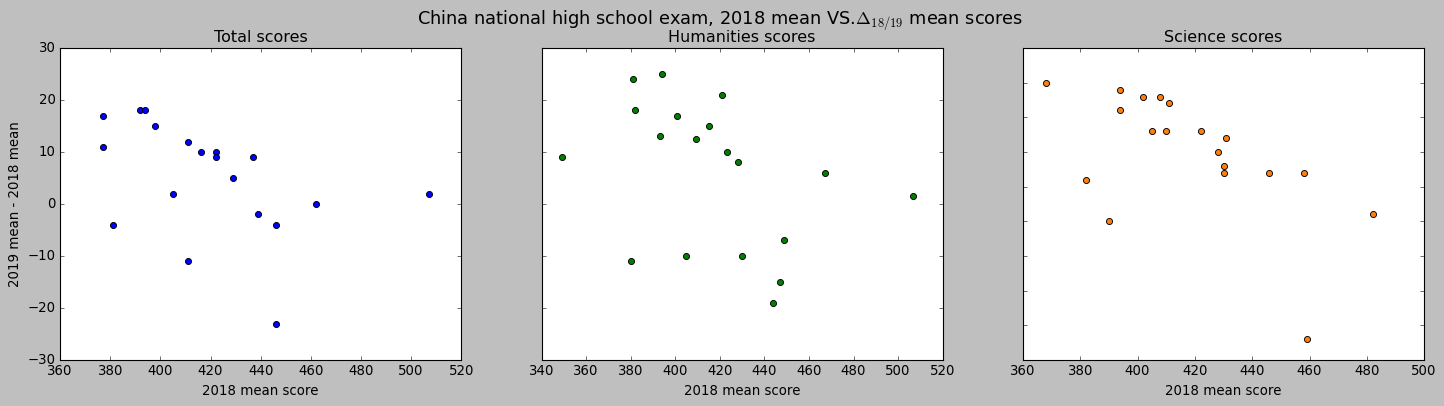

In [228]:
#Plot Mean
fig, axs = plt.subplots(1,3,figsize=(22,5))
axs[0].scatter(total_mean18, total_mean19 - total_mean18, s=30,edgecolor='black',linewidth=0.8)
axs[0].set_title('Total scores')
axs[1].scatter(wen_mean18, wen_mean19 - wen_mean18, color='green',s=30,edgecolor='black',linewidth=0.8)
axs[1].set_title('Humanities scores')
axs[2].scatter(li_mean18, li_mean19 - li_mean18, color='tab:orange',s=30,edgecolor='black',linewidth=0.8)
axs[2].set_title('Science scores')
plt.suptitle('China national high school exam, 2018 mean VS.' r"$\Delta_{18/19}$ mean scores", fontsize=16)
for ax in axs.flat:
    ax.set(xlabel='2018 mean score', ylabel='2019 mean - 2018 mean')
for ax in fig.get_axes():
    ax.label_outer()
fig.subplots_adjust(top=0.88)

In [95]:
total_med18 = tot_med[:,0]
total_med19 = tot_med[:,1]
total_med20 = tot_med[:,2]
wen_med18 = wen_med[:,0]
wen_med19 = wen_med[:,1]
wen_med20 = wen_med[:,2]
li_med18 = li_med[:,0]
li_med19 = li_med[:,1]
li_med20 = li_med[:,2]

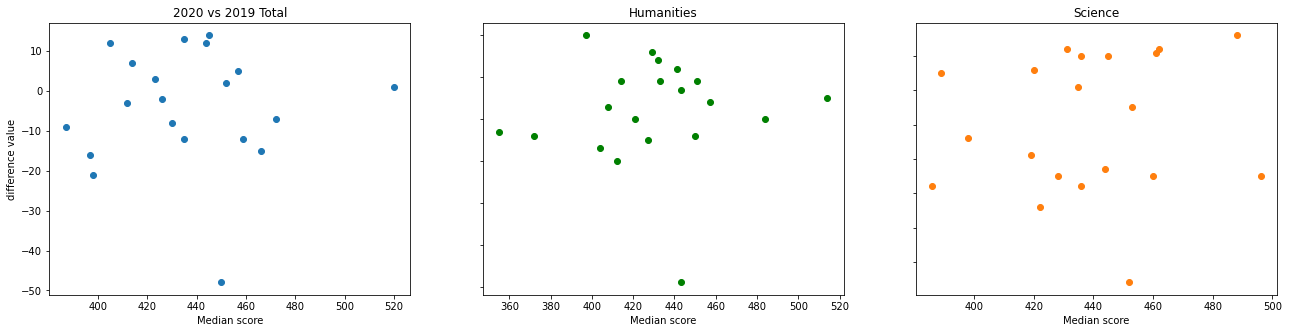

In [96]:
#Plot median
fig, axs = plt.subplots(1,3,figsize=(22,5))
axs[0].scatter(total_med19, total_med20 - total_med19)
axs[0].set_title('2020 vs 2019 Total')
axs[1].scatter(wen_med19, wen_med20 - wen_med19, color='green')
axs[1].set_title('Humanities')
axs[2].scatter(li_med19, li_med20 - li_med19, color='tab:orange')
axs[2].set_title('Science')
for ax in axs.flat:
    ax.set(xlabel='Median score', ylabel='difference value')
for ax in fig.get_axes():
    ax.label_outer()

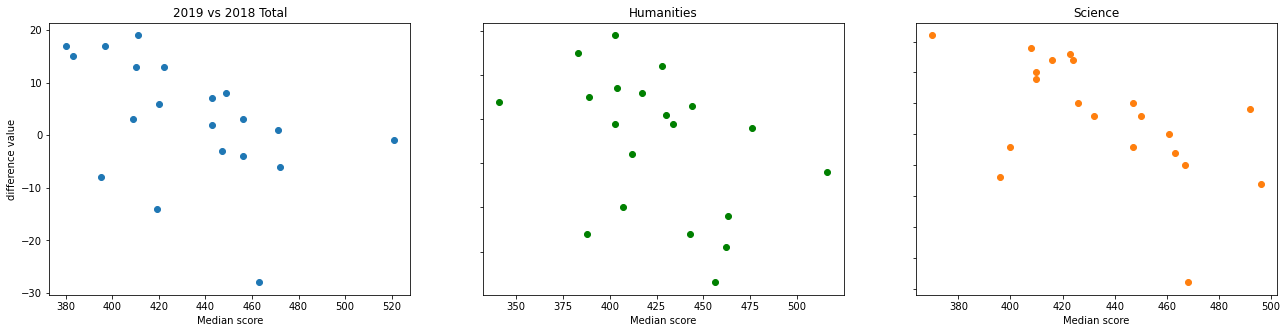

In [97]:
fig, axs = plt.subplots(1,3,figsize=(22,5))
axs[0].scatter(total_med18, total_med19 - total_med18)
axs[0].set_title('2019 vs 2018 Total')
axs[1].scatter(wen_med18, wen_med19 - wen_med18, color='green')
axs[1].set_title('Humanities')
axs[2].scatter(li_med18, li_med19 - li_med18, color='tab:orange')
axs[2].set_title('Science')
for ax in axs.flat:
    ax.set(xlabel='Median score', ylabel='difference value')
for ax in fig.get_axes():
    ax.label_outer()

In [98]:
total_25quant18 = tot_quant25[:,0]
total_25quant19 = tot_quant25[:,1]
total_25quant20 = tot_quant25[:,2]
wen_25quant18 = wen_quant25[:,0]
wen_25quant19 = wen_quant25[:,1]
wen_25quant20 = wen_quant25[:,2]
li_25quant18 = li_quant25[:,0]
li_25quant19 = li_quant25[:,1]
li_25quant20 = li_quant25[:,2]

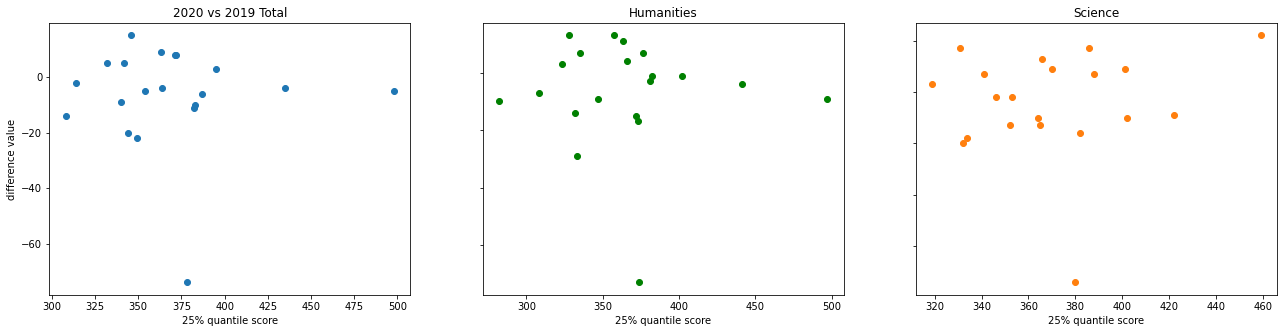

In [99]:
#Plot 25% quantile
fig, axs = plt.subplots(1,3,figsize=(22,5))
axs[0].scatter(total_25quant19, total_25quant20 - total_25quant19)
axs[0].set_title('2020 vs 2019 Total')
axs[1].scatter(wen_25quant19, wen_25quant20 - wen_25quant19, color='green')
axs[1].set_title('Humanities')
axs[2].scatter(li_25quant19, li_25quant20 - li_25quant19, color='tab:orange')
axs[2].set_title('Science')
for ax in axs.flat:
    ax.set(xlabel='25% quantile score', ylabel='difference value')
for ax in fig.get_axes():
    ax.label_outer()

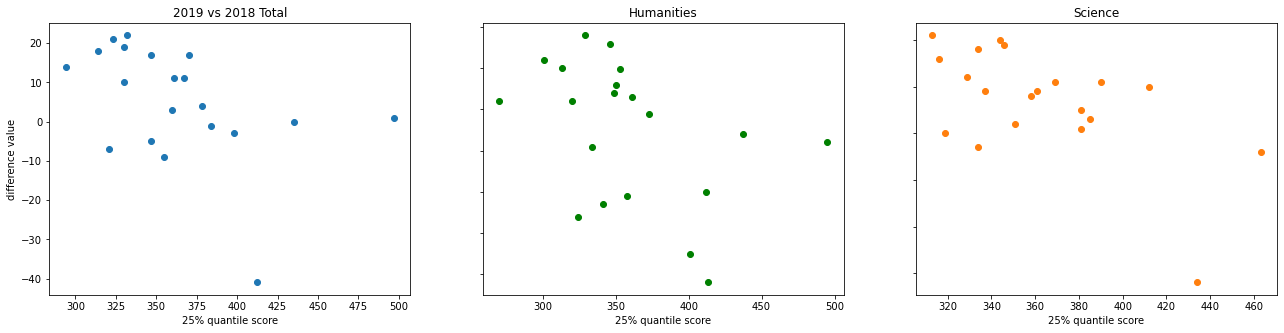

In [100]:
fig, axs = plt.subplots(1,3,figsize=(22,5))
axs[0].scatter(total_25quant18, total_25quant19 - total_25quant18)
axs[0].set_title('2019 vs 2018 Total')
axs[1].scatter(wen_25quant18, wen_25quant19 - wen_25quant18, color='green')
axs[1].set_title('Humanities')
axs[2].scatter(li_25quant18, li_25quant19 - li_25quant18, color='tab:orange')
axs[2].set_title('Science')
for ax in axs.flat:
    ax.set(xlabel='25% quantile score', ylabel='difference value')
for ax in fig.get_axes():
    ax.label_outer()

In [101]:
total_75quant18 = tot_quant75[:,0]
total_75quant19 = tot_quant75[:,1]
total_75quant20 = tot_quant75[:,2]
wen_75quant18 = wen_quant75[:,0]
wen_75quant19 = wen_quant75[:,1]
wen_75quant20 = wen_quant75[:,2]
li_75quant18 = li_quant75[:,0]
li_75quant19 = li_quant75[:,1]
li_75quant20 = li_quant75[:,2]

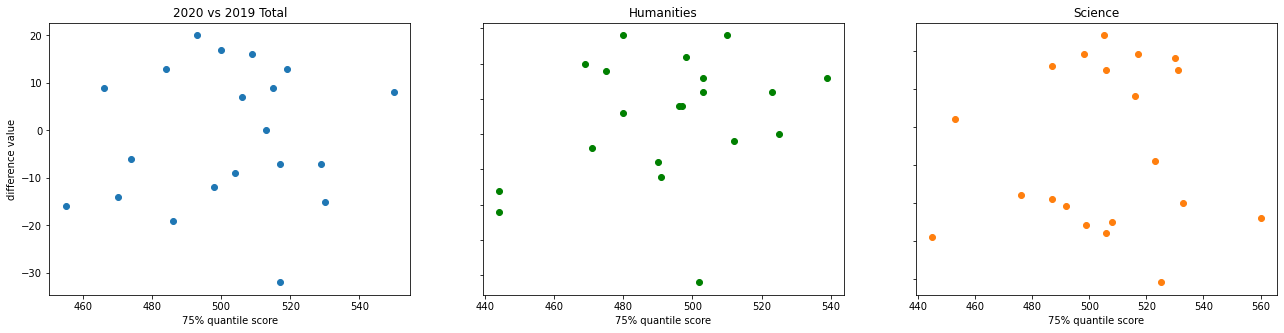

In [102]:
#Plot 75% quantile
fig, axs = plt.subplots(1,3,figsize=(22,5))
axs[0].scatter(total_75quant19, total_75quant20 - total_75quant19)
axs[0].set_title('2020 vs 2019 Total')
axs[1].scatter(wen_75quant19, wen_75quant20 - wen_75quant19, color='green')
axs[1].set_title('Humanities')
axs[2].scatter(li_75quant19, li_75quant20 - li_75quant19, color='tab:orange')
axs[2].set_title('Science')
for ax in axs.flat:
    ax.set(xlabel='75% quantile score', ylabel='difference value')
for ax in fig.get_axes():
    ax.label_outer()

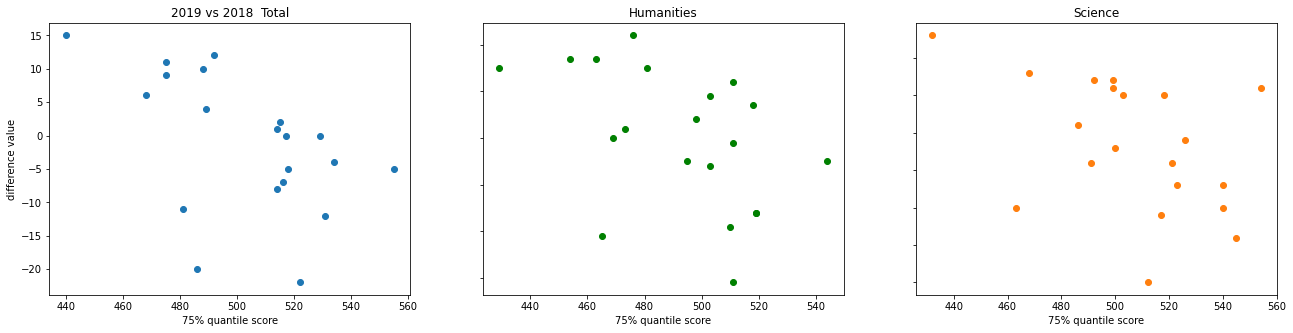

In [103]:
fig, axs = plt.subplots(1,3,figsize=(22,5))
axs[0].scatter(total_75quant18, total_75quant19 - total_75quant18)
axs[0].set_title('2019 vs 2018  Total')
axs[1].scatter(wen_75quant18, wen_75quant19 - wen_75quant18, color='green')
axs[1].set_title('Humanities')
axs[2].scatter(li_75quant18, li_75quant19 - li_75quant18, color='tab:orange')
axs[2].set_title('Science')
for ax in axs.flat:
    ax.set(xlabel='75% quantile score', ylabel='difference value')
for ax in fig.get_axes():
    ax.label_outer()

Conduct Spearman rank correlation test for year 2019-2020:

In [108]:
print('P-value of total mean' ,stats.spearmanr(total_mean19, total_mean20 - total_mean19)[1])
print('P-value of humanities mean' ,stats.spearmanr(wen_mean19, wen_mean20 - wen_mean19)[1])
print('P-value of science mean' ,stats.spearmanr(li_mean19, li_mean20 - li_mean19)[1])
print('\n')
print('P-value of total median' ,stats.spearmanr(total_med19, total_med20 - total_med19)[1])
print('P-value of humanities median' ,stats.spearmanr(wen_med19, wen_med20 - wen_med19)[1])
print('P-value of science median' ,stats.spearmanr(li_med19, li_med20 - li_med19)[1])
print('\n')
print('P-value of total 25% quantile' ,stats.spearmanr(total_25quant19, total_25quant20 - total_25quant19)[1])
print('P-value of humanities 25% quantile' ,stats.spearmanr(wen_25quant19, wen_25quant20 - wen_25quant19)[1])
print('P-value of science 25% quantile' ,stats.spearmanr(li_25quant19, li_25quant20 - li_25quant19)[1])
print('\n')
print('P-value of total 75% quantile' ,stats.spearmanr(total_75quant19, total_75quant20 - total_75quant19)[1])
print('P-value of humanities 75% quantile' ,stats.spearmanr(wen_75quant19, wen_75quant20 - wen_75quant19)[1])
print('P-value of science 75% quantile' ,stats.spearmanr(li_75quant19, li_75quant20 - li_75quant19)[1])
print('\n')

P-value of total mean 0.5510027185401427
P-value of humanities mean 0.47681894370042155
P-value of science mean 0.21200019131578157


P-value of total median 0.7972328361602012
P-value of humanities median 0.5662229041258557
P-value of science median 0.2915327985637345


P-value of total 25% quantile 0.8598860349376966
P-value of humanities 25% quantile 0.8698093762955916
P-value of science 25% quantile 0.3631842558629732


P-value of total 75% quantile 0.9184282758939954
P-value of humanities 75% quantile 0.312606536522737
P-value of science 75% quantile 0.8909571659306131




In [272]:
print('P-value of total mean' ,stats.spearmanr(covid_by_pop, total_mean20 - total_mean19)[1])
print('P-value of humanities mean' ,stats.spearmanr(covid_by_pop, wen_mean20 - wen_mean19)[1])
print('P-value of science mean' ,stats.spearmanr(covid_by_pop, li_mean20 - li_mean19)[1])
print('\n')

P-value of total mean 0.5078481726211508
P-value of humanities mean 0.004078517355901918
P-value of science mean 0.7448651285187388




GENERAL

In [219]:
k,w,l = get_KS(provinces)
ks_data = {'provinces': provinces, 'totalKS_1819': k[0], 'totalKS_1920': k[1],
          'artsKS_1819':w[0], 'artsKS_1920':w[1], 'scienceKS_1819': l[0], 'scienceKS_1920': l[1]}
ks_df = pd.DataFrame.from_dict(ks_data)
# ks_df

In [220]:
ks_df = add_eng(ks_df, prov_dict)
ks_df = ks_df.sort_values(by='eng_provinces')

#### KS plots with COVID confirmed cases

In [203]:
china_confirmed.max()

2046

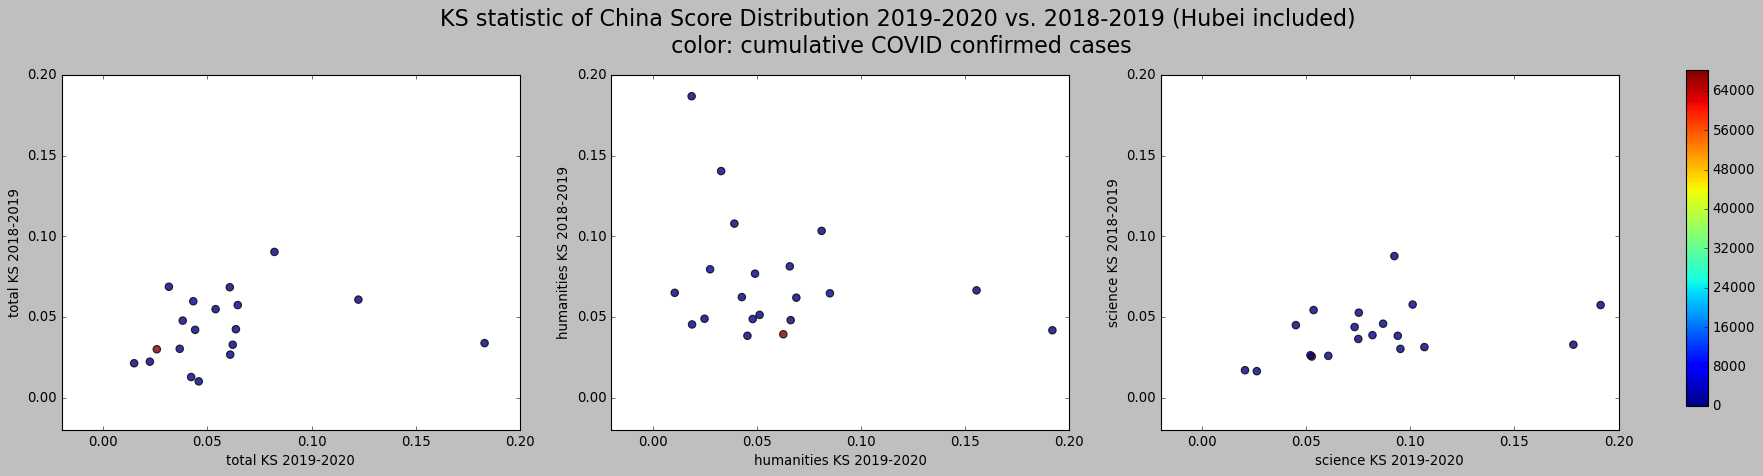

In [222]:
fig, axs = plt.subplots(1,3,figsize=(28,6))
plt.style.use('classic')
# cov_deaths = us_covid['Deaths'].values
colormap = plt.cm.jet
colour = china_confirmed
# colour = np.delete(china_confirmed,9)
axs[0].scatter(ks_df['totalKS_1920'].values, ks_df['totalKS_1819'].values, s = 45, c = colour, alpha = 0.8)
axs[0].set_xlabel('total KS 2019-2020')
axs[0].set_ylabel('total KS 2018-2019')
axs[1].scatter(ks_df['artsKS_1920'].values, ks_df['artsKS_1819'].values, s = 45, c = colour, alpha = 0.8)
axs[1].set_xlabel('humanities KS 2019-2020')
axs[1].set_ylabel('humanities KS 2018-2019')
axs[2].scatter(ks_df['scienceKS_1920'].values, ks_df['scienceKS_1819'].values, s = 45, c = colour, alpha = 0.8)
axs[2].set_xlabel('science KS 2019-2020')
axs[2].set_ylabel('science KS 2018-2019')
for ax in axs:
    ax.set_ylim(-0.02, 0.2)
    ax.set_xlim(-0.02, 0.2)
sm = plt.cm.ScalarMappable(cmap=colormap)
sm.set_clim(vmin=0, vmax=68200)
# sm.set_clim(vmin=0, vmax=2100)
fig.subplots_adjust(right=0.82)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(sm, cax=cbar_ax)
plt.suptitle('KS statistic of China Score Distribution 2019-2020 vs. 2018-2019 (Hubei included) \n color: cumulative COVID confirmed cases ',fontsize=20)
fig.subplots_adjust(top=0.84)
plt.show()

#### KS plots with COVID confirmed by pop cases

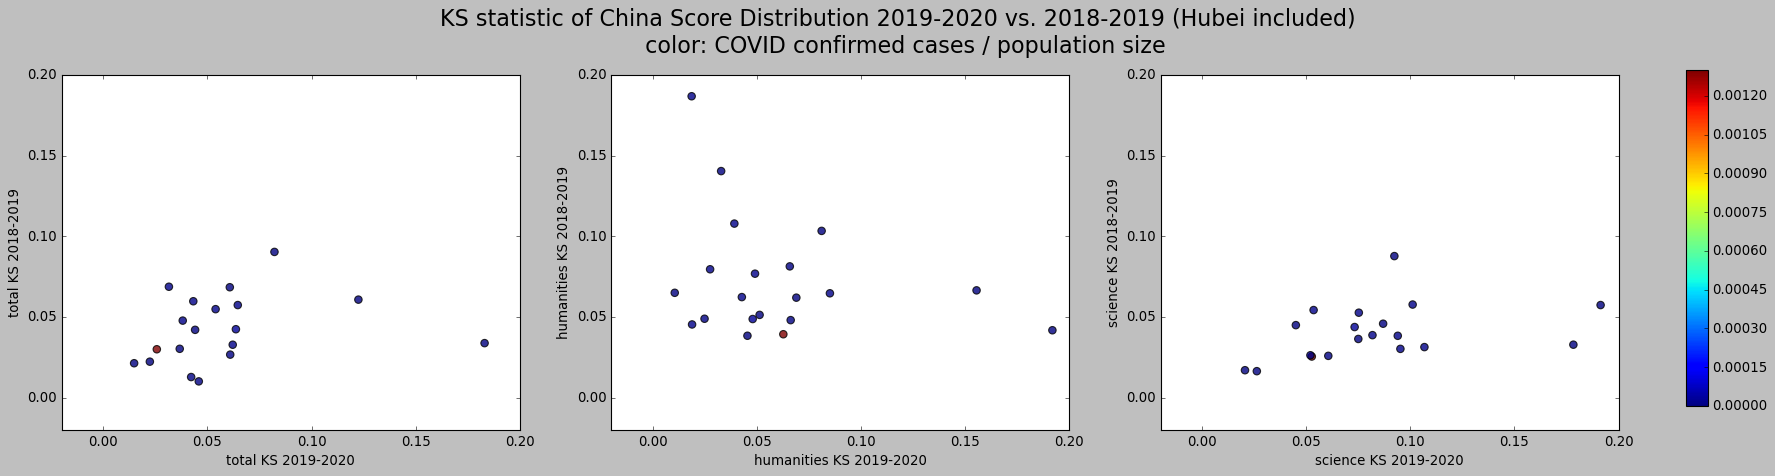

In [223]:
fig, axs = plt.subplots(1,3,figsize=(28,6))
plt.style.use('classic')
# cov_deaths = us_covid['Deaths'].values
colormap = plt.cm.jet
colour = covid_by_pop
# colour = np.delete(china_confirmed,9)
axs[0].scatter(ks_df['totalKS_1920'].values, ks_df['totalKS_1819'].values, s = 45, c = colour, alpha = 0.8)
axs[0].set_xlabel('total KS 2019-2020')
axs[0].set_ylabel('total KS 2018-2019')
axs[1].scatter(ks_df['artsKS_1920'].values, ks_df['artsKS_1819'].values, s = 45, c = colour, alpha = 0.8)
axs[1].set_xlabel('humanities KS 2019-2020')
axs[1].set_ylabel('humanities KS 2018-2019')
axs[2].scatter(ks_df['scienceKS_1920'].values, ks_df['scienceKS_1819'].values, s = 45, c = colour, alpha = 0.8)
axs[2].set_xlabel('science KS 2019-2020')
axs[2].set_ylabel('science KS 2018-2019')
for ax in axs:
    ax.set_ylim(-0.02, 0.2)
    ax.set_xlim(-0.02, 0.2)
sm = plt.cm.ScalarMappable(cmap=colormap)
# sm.set_clim(vmin=0, vmax=0.000031)
sm.set_clim(vmin=0, vmax=0.0013)
fig.subplots_adjust(right=0.82)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(sm, cax=cbar_ax)
plt.suptitle('KS statistic of China Score Distribution 2019-2020 vs. 2018-2019 (Hubei included) \n color: COVID confirmed cases / population size',fontsize=20)
fig.subplots_adjust(top=0.84)
plt.show()

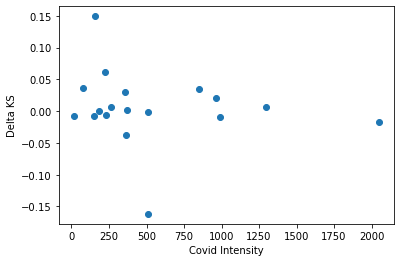

In [123]:
#delta_KS to covid intensity
delta_KS = ks_df['totalKS_1920'].values - ks_df['totalKS_1819'].values
china_nohubei = np.delete(china_confirmed, 9)
delta_KS_nohubei = np.delete(delta_KS, 9)
plt.scatter(china_nohubei, delta_KS_nohubei)
plt.xlabel('Covid Intensity')
plt.ylabel('Delta KS');

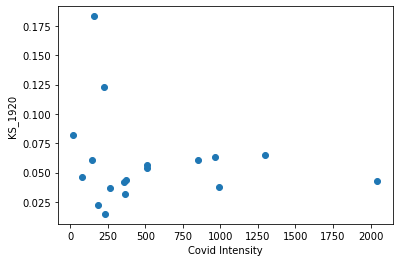

In [124]:
#KS_1920 to covid intensity
KS_1920 = ks_df['totalKS_1920'].values 
KS1920_nohubei = np.delete(KS_1920, 9)
plt.scatter(china_nohubei, KS1920_nohubei)
plt.xlabel('Covid Intensity')
plt.ylabel('KS_1920');

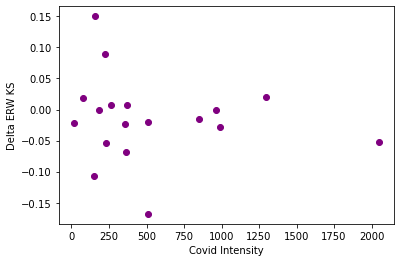

In [125]:
delta_arts_KS = ks_df['artsKS_1920'].values - ks_df['artsKS_1819'].values
delta_arts_KS_nohubei = np.delete(delta_arts_KS, 9)
plt.scatter(china_nohubei, delta_arts_KS_nohubei, color = 'purple')
plt.xlabel('Covid Intensity')
plt.ylabel('Delta ERW KS');

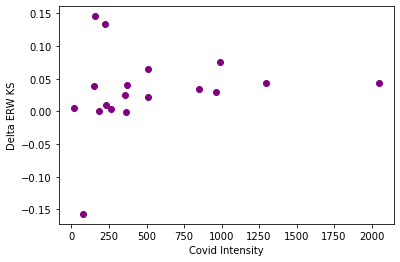

In [126]:
delta_science_KS = ks_df['scienceKS_1920'].values - ks_df['scienceKS_1819'].values
delta_science_KS_nohubei = np.delete(delta_science_KS, 9)
plt.scatter(china_nohubei, delta_science_KS_nohubei, color = 'purple')
plt.xlabel('Covid Intensity')
plt.ylabel('Delta ERW KS');